# Investigating Netflix Movies

## Part1

### Import the data

In [33]:
import pandas as pd

netflix_data: pd.DataFrame = pd.read_csv("netflix_data.csv")

## What was the most frequent movie duration in the 1990s? 

### Narrow down the type to "Movie" and the release year to 1990 - 1999

In [106]:
is_movie = 'type == "Movie"'
is_1990s =  '1990 <= release_year < 2000'
netflix_data.query(f"{is_movie} & {is_1990s}")["duration"].value_counts()

duration
94     8
101    6
93     5
95     5
108    5
      ..
189    1
28     1
98     1
58     1
191    1
Name: count, Length: 95, dtype: int64

## A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

In [107]:
is_action = 'genre == "Action"'
is_shorter_than_90min = 'duration < 90'
short_movie_count = len(netflix_data.query(f"{is_movie} & {is_1990s} & {is_action} & {is_shorter_than_90min}"))
short_movie_count

8

## Part2

## To determine whether the average duration of movies on Netflix has been declining over the years.

### The average movie duration for each release year.

In [108]:
average_movie_durations = netflix_data.query(is_movie).groupby("release_year")["duration"].mean()
average_movie_durations

release_year
1942    35.000000
1943    62.666667
1944    52.000000
1945    51.333333
1946    58.000000
          ...    
2017    94.836022
2018    96.170300
2019    93.457045
2020    89.795620
2021    80.166667
Name: duration, Length: 72, dtype: float64

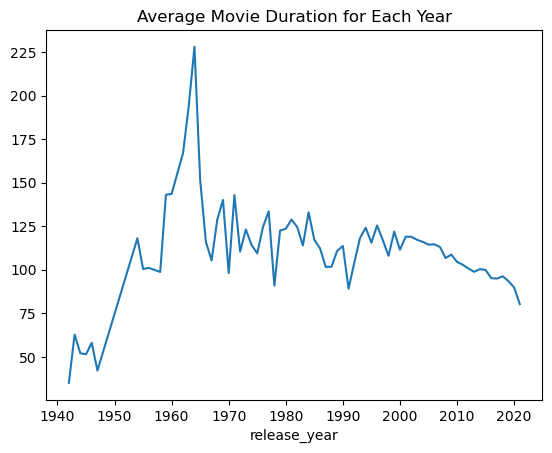

In [109]:
import matplotlib.pyplot as plt

average_movie_durations.plot(kind="line",title="Average Movie Duration for Each Year")
plt.show()

### The tendency of the number of short movies (which is less than 90 minutes).

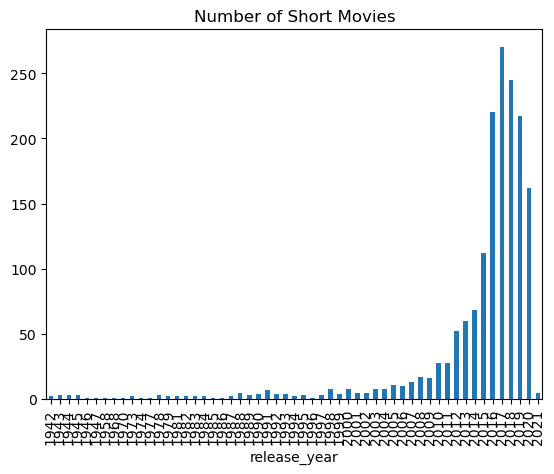

In [217]:
short_movie_counts = (
    netflix_data.query(f"{is_movie} & {is_shorter_than_90min}")
    .groupby("release_year")["show_id"]
    .count()
)
short_movie_counts.plot(kind="bar", title="Number of Short Movies")
plt.show()

But, the total number of movies is also increasing.

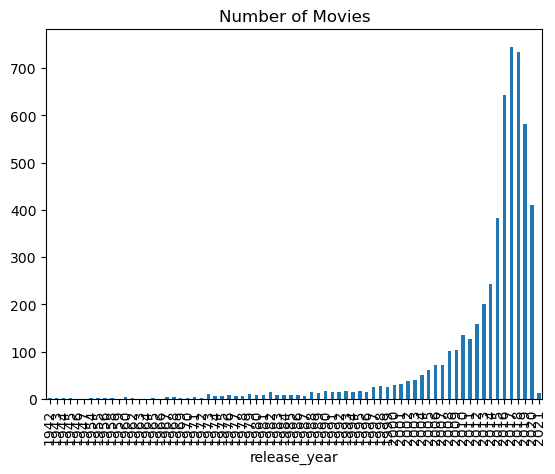

In [241]:
movie_counts = netflix_data.query(is_movie).groupby("release_year")["show_id"].count()
movie_counts.plot(kind="bar", title="Number of Movies")
plt.show()

### Histograms of movie duration in the 1990s, 2000s, and 2010s (2010s including 2020s's data due to paucity).

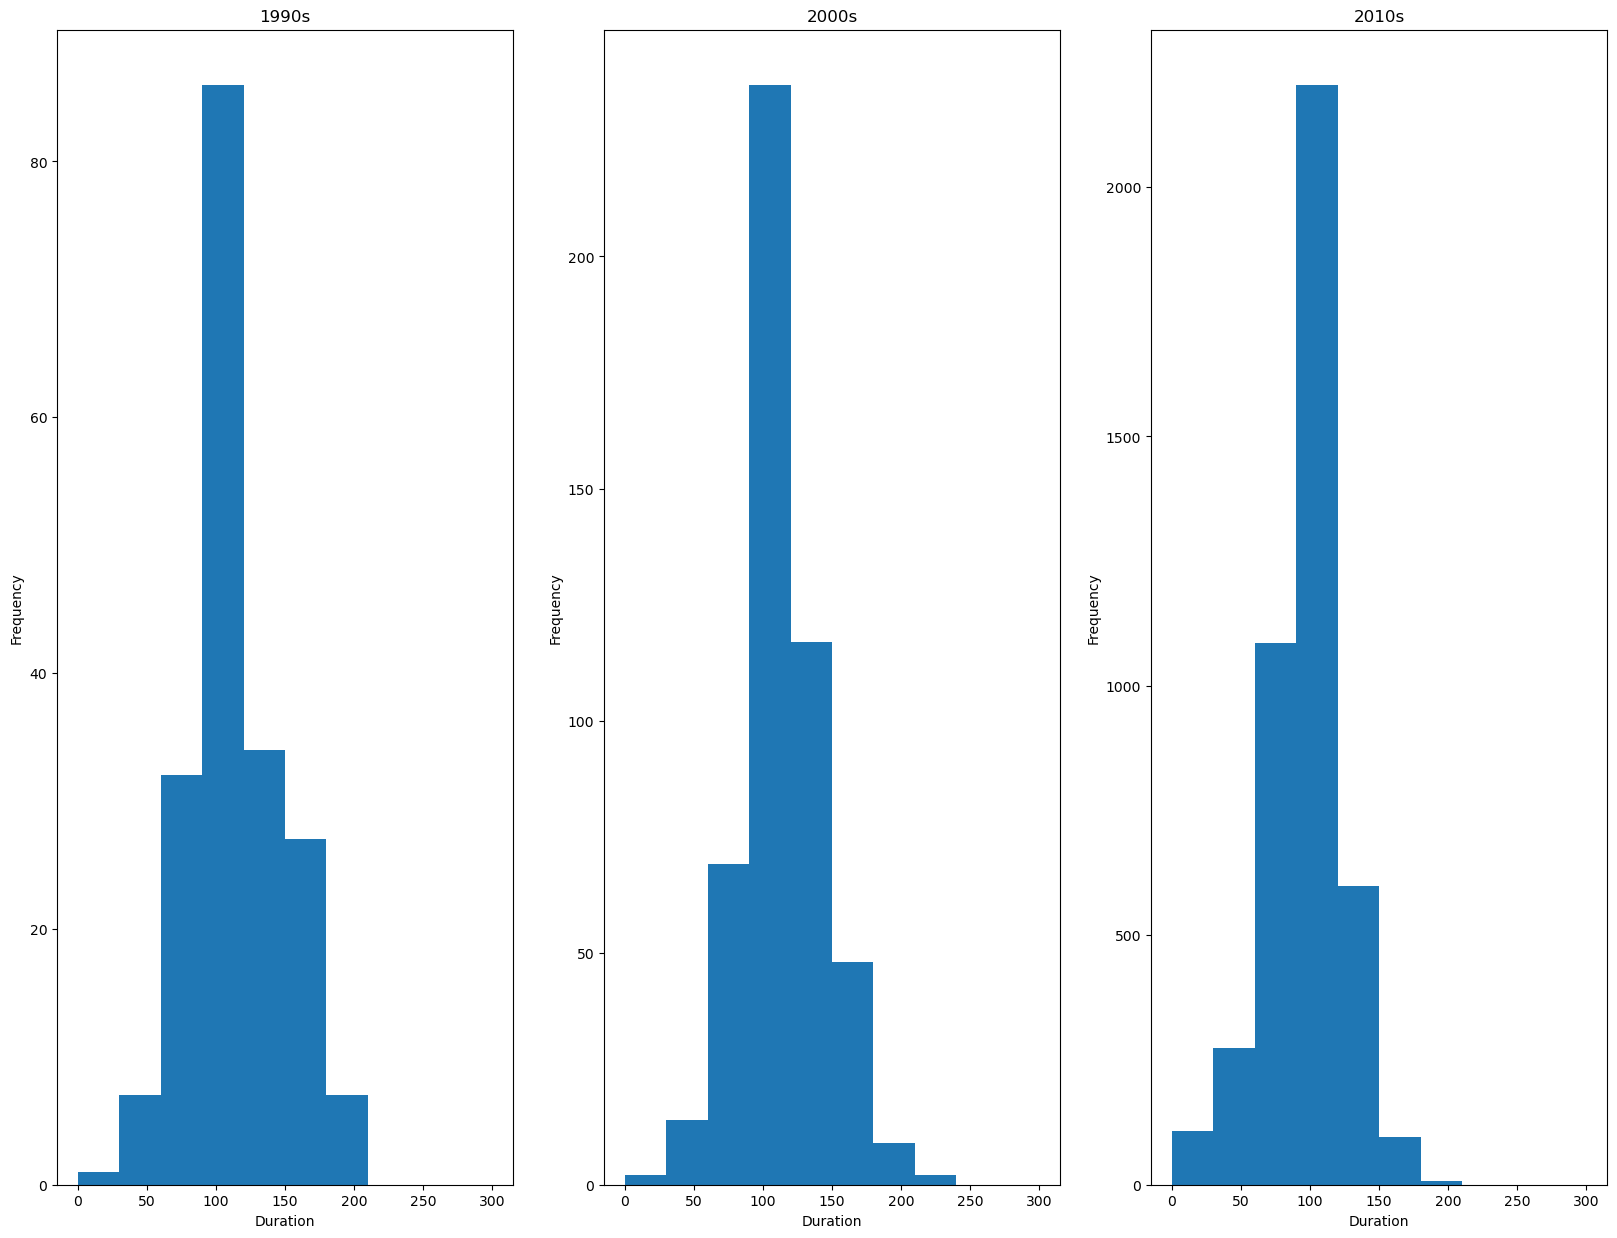

In [308]:
is_2000s = "2000 <= release_year < 2009"
is_2010s = "2010 <= release_year"

short_movies = netflix_data.query(is_movie)
short_movie_count_1990s = short_movies.query(is_1990s)
short_movie_count_2000s = short_movies.query(is_2000s)
short_movie_count_2010s = short_movies.query(is_2010s)

fig, axes = plt.subplots(1, 3, figsize=(20, 15))
short_movie_count_1990s["duration"].plot(
    kind="hist", ax=axes[0], title="1990s", xlabel="Duration", range=(0, 300)
)
short_movie_count_2000s["duration"].plot(
    kind="hist", ax=axes[1], title="2000s", xlabel="Duration", range=(0, 300)
)
short_movie_count_2010s["duration"].plot(
    kind="hist", ax=axes[2], title="2010s", xlabel="Duration", range=(0, 300)
)
plt.show()

The number of movies over 90 minutes is slightly decreasing.

### Genre Tendency

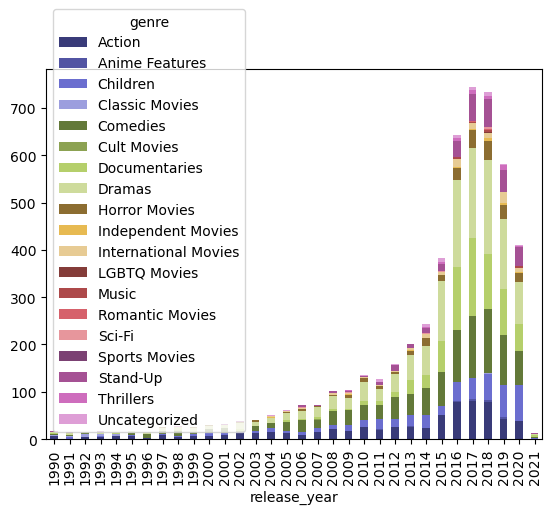

In [401]:
is_after_1990 = "1990 <= release_year <= 2029"
netflix_data.query(f"{is_movie} & {is_after_1990}").groupby(["release_year", "genre"])[
    "genre"
].size().unstack().plot(kind="bar", stacked=True, colormap="tab20b")
plt.show()

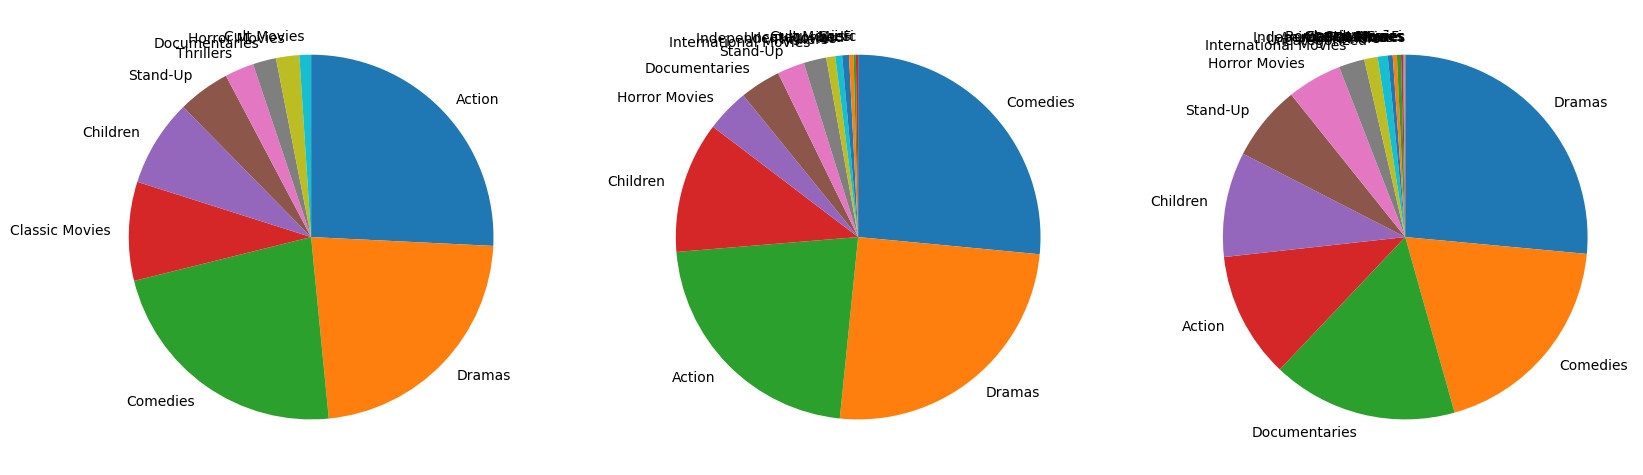

In [402]:
is_after_1990 = "1990 <= release_year <= 2029"
movies_1990s = netflix_data.query(f"{is_movie} & {is_1990s}")
movies_2000s = netflix_data.query(f"{is_movie} & {is_2000s}")
movies_2010s = netflix_data.query(f"{is_movie} & {is_2010s}")

fig, axes = plt.subplots(1, 3, figsize=(20, 15))

axes[0].pie(
    movies_1990s["genre"].value_counts(),
    labels=movies_1990s["genre"].value_counts().index,
    counterclock=False,
    startangle=90,
)
axes[1].pie(
    movies_2000s["genre"].value_counts(),
    labels=movies_2000s["genre"].value_counts().index,
    counterclock=False,
    startangle=90,
)
axes[2].pie(
    movies_2010s["genre"].value_counts(),
    labels=movies_2010s["genre"].value_counts().index,
    counterclock=False,
    startangle=90,
)
plt.show()

"Documentaries" emerged on the chart in the 2010s.
Additionally, "Action" lost its dominance.

In [403]:
netflix_data.query(is_movie).groupby("genre")["duration"].mean()

genre
Action                  113.282940
Anime Features           93.368421
Children                 78.087649
Classic Movies          112.428571
Comedies                107.200186
Cult Movies             100.500000
Documentaries            81.881491
Dramas                  111.796243
Horror Movies            97.401639
Independent Movies       98.700000
International Movies    109.464912
LGBTQ Movies             99.000000
Music                    91.117647
Romantic Movies          83.333333
Sci-Fi                  108.090909
Sports Movies            87.000000
Stand-Up                 66.610592
Thrillers                97.244898
Uncategorized            45.946429
Name: duration, dtype: float64

## What if not by release_year but date_added? = Not the movie trend but the Netflix trend

In [404]:
netflix_data["year_added"] = netflix_data["date_added"].str[-4:]
average_movie_durations_by_date_added = netflix_data.query(is_movie).groupby("year_added")["duration"].mean()
average_movie_durations_by_date_added

year_added
2008     81.000000
2009     66.500000
2010     84.000000
2011     93.461538
2012     62.000000
2013     83.500000
2014     77.000000
2015     82.758621
2016     83.879845
2017     95.833333
2018    101.719522
2019    100.523046
2020    101.766006
2021    107.011364
Name: duration, dtype: float64

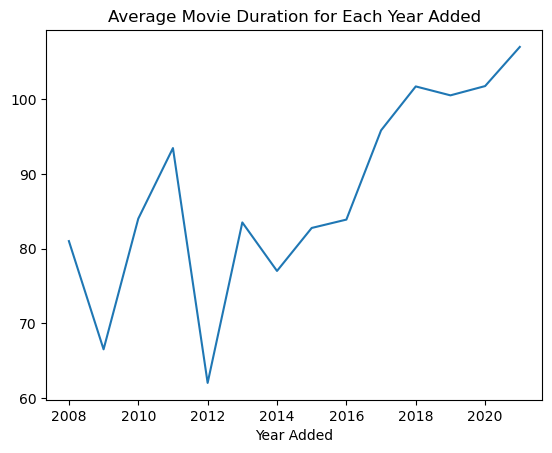

In [405]:
average_movie_durations_by_date_added.plot(kind="line",title="Average Movie Duration for Each Year Added", xlabel="Year Added")
plt.show()

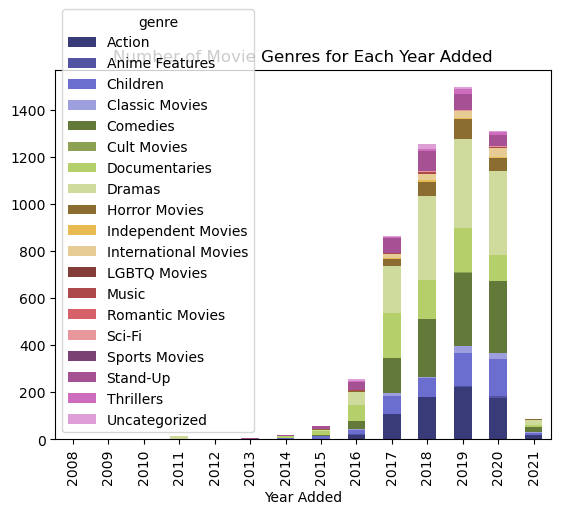

In [406]:
netflix_data.query(is_movie).groupby(["year_added", "genre"]).size().unstack().plot(
    kind="bar",
    stacked=True,
    xlabel="Year Added",
    title="Number of Movie Genres for Each Year Added",
    colormap="tab20b"
)
plt.show()

## Conclusion

- Based on the release year
   - The average duration of movies on Netflix has been declining over the years.
   - The number of short movies has been increasing.
   - "Action", which is typically longer due to its complex plot, has dropped back in the chart, "Documentaries," on the other hand, which tends to be shorter as it focuses on a specific topic, has dominated.
   - Because of its costs and the rise of Internet streaming service?
- Based on the year added
   - Considering recent decade trends, the movie duration on Netflix is also  likely to be shortened.
   - Because of its watching situation, normally relaxed, at home?
